# Download & Read the Dataset

In [1]:
! gdown --id 1vW_RyM_Ioe2nPfAgtMhpdhhTEbUzmlKo # Download Static dataset
! gdown --id 1n8Fn0H_xNg9avvjbkDOlhMKf6UiQ3IA2 # Download Kafka dataset

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1vW_RyM_Ioe2nPfAgtMhpdhhTEbUzmlKo
To: /content/Static_dataset.csv
100% 17.3M/17.3M [00:00<00:00, 50.0MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1n8Fn0H_xNg9avvjbkDOlhMKf6UiQ3IA2
To: /content/Kafka_dataset.csv
100% 17.3M/17.3M [00:00<00:00, 50.9MB/s]


In [2]:
import pandas as pd
data = pd.read_csv('/content/Static_dataset.csv')
data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


# Data Analysis

## Validate data imbalanced with justifications

In [3]:
data['Target Attack'].value_counts()

1    147179
0    120895
Name: Target Attack, dtype: int64

No     54.902378
Yes    45.097622
Name: Target Attack, dtype: float64

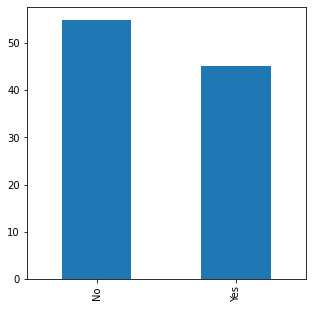

In [4]:
Attack_percentages = data['Target Attack'].value_counts(normalize=True) * 100
Attack_percentages.index = ['No',"Yes"]
Attack_percentages.plot.bar(figsize=(5, 5));
Attack_percentages

- The dataset slightly imbalanced as 55% false and 45% true, So, there is a difference of 10% between the false and true classes.

## Statistical analysis of data

In [5]:
features =data.drop('Target Attack', axis=1)
features.describe().T

,count,mean,std,min,25%,50%,75%,max
FQDN_count,268074.0,22.286596,6.001205,2.000000,18.000000,24.000000,27.000000,36.000000
subdomain_length,268074.0,6.059021,3.899505,0.000000,3.000000,7.000000,10.000000,23.000000
upper,268074.0,0.845420,4.941929,0.000000,0.000000,0.000000,0.000000,32.000000
lower,268074.0,10.410014,3.207725,0.000000,10.000000,10.000000,10.000000,34.000000
numeric,268074.0,6.497586,4.499866,0.000000,0.000000,8.000000,10.000000,12.000000
entropy,268074.0,2.485735,0.407709,0.219195,2.054029,2.570417,2.767195,4.216847
special,268074.0,4.533577,2.187683,0.000000,2.000000,6.000000,6.000000,7.000000
labels,268074.0,4.788823,1.803256,1.000000,3.000000,6.000000,6.000000,7.000000
labels_max,268074.0,8.252233,4.415355,2.000000,7.000000,7.000000,7.000000,32.000000
labels_average,268074.0,4.802239,4.573066,2.000000,3.166667,3.666667,4.000000,32.000000


In [6]:
features.nunique()

timestamp           35924
FQDN_count             34
subdomain_length       24
upper                   5
lower                  34
numeric                13
entropy               630
special                 8
labels                  7
labels_max             31
labels_average         73
longest_word         6224
sld                 11112
len                    32
subdomain               2
dtype: int64

### Histograms

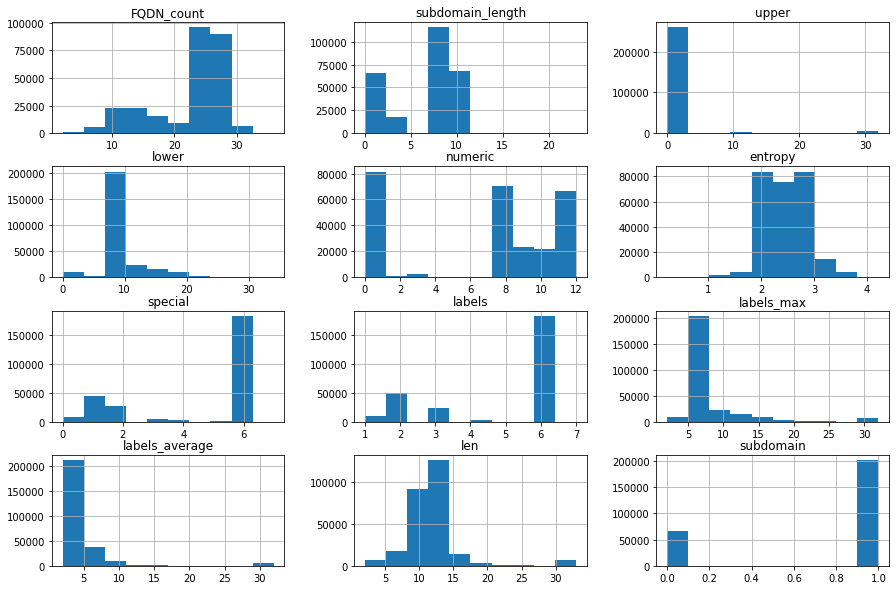

In [8]:
features.hist(figsize=(15,10));

### Boxplots

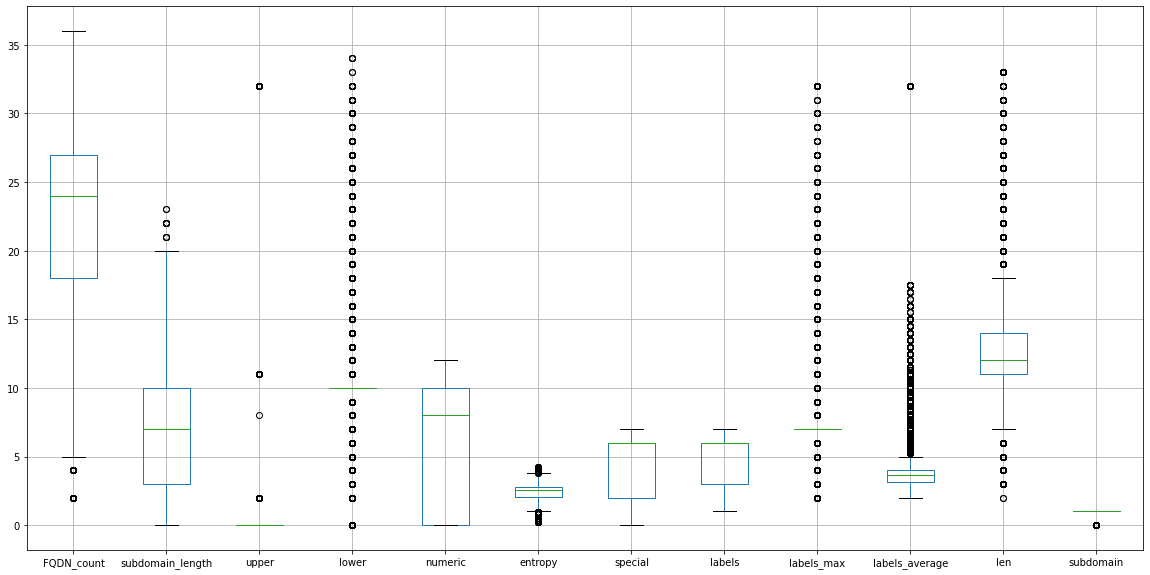

In [7]:
import matplotlib.pyplot as plt

features.boxplot(figsize=(20,10))

### Check the skewness

In [9]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


FQDN_count         -1.101731
subdomain_length   -0.590480
upper               5.988737
lower               0.343449
numeric            -0.594384
entropy            -0.140156
special            -0.902972
labels             -0.903680
labels_max          3.979910
labels_average      5.087081
len                 2.634801
subdomain          -1.176397
Target Attack      -0.197046
dtype: float64

- The highly negative score represents the left skew, and the positive represents the right skew. 

### KDE

### Right skew

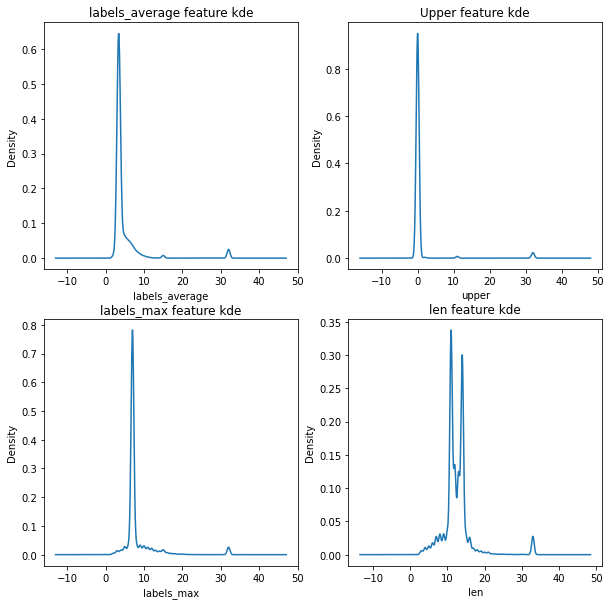

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10));

plt.subplot(2, 2, 1);
data['labels_average'].plot.kde()
plt.title('labels_average feature kde')
plt.ylabel('Density');
plt.xlabel('labels_average');

plt.subplot(2, 2, 2);
data['upper'].plot.kde()
plt.title('Upper feature kde')
plt.ylabel('Density');
plt.xlabel('upper');

plt.subplot(2, 2, 3);
data['labels_max'].plot.kde()
plt.title('labels_max feature kde')
plt.ylabel('Density');
plt.xlabel('labels_max');


plt.subplot(2, 2, 4);
data['len'].plot.kde()
plt.title('len feature kde')
plt.ylabel('Density');
plt.xlabel('len');


### Left skew

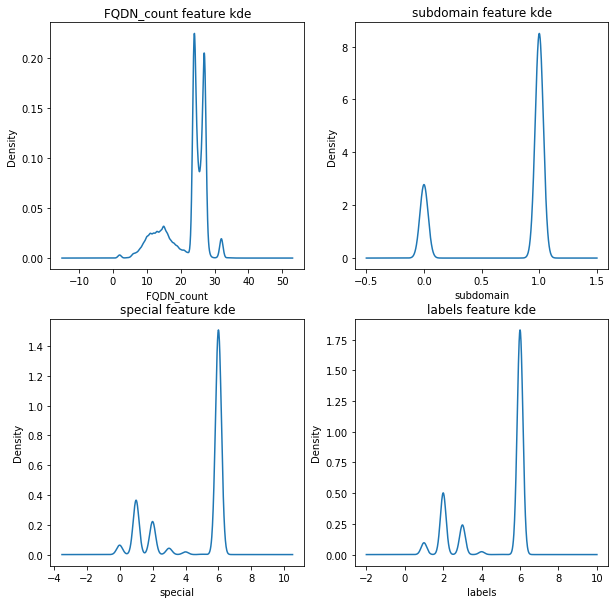

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10));

plt.subplot(2, 2, 1);
data['FQDN_count'].plot.kde()
# plt.plot(unfreezed_history.history['loss'])
plt.title('FQDN_count feature kde')
plt.ylabel('Density');
plt.xlabel('FQDN_count');

plt.subplot(2, 2, 2);
data['subdomain'].plot.kde()
plt.title('subdomain feature kde')
plt.ylabel('Density');
plt.xlabel('subdomain');

plt.subplot(2, 2, 3);
data['special'].plot.kde()
plt.title('special feature kde')
plt.ylabel('Density');
plt.xlabel('special');

plt.subplot(2, 2, 4);
data['labels'].plot.kde()
plt.title('labels feature kde')
plt.ylabel('Density');
plt.xlabel('labels');

# Feature engineering and data cleaning

## Data Cleansing

In [12]:
# check the nulls in the data
data.isnull().sum()

timestamp           0
FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
longest_word        8
sld                 0
len                 0
subdomain           0
Target Attack       0
dtype: int64

In [13]:
# as there is only 8 rows has nulls so we can drop them
data.dropna(inplace=True)

In [14]:
data.isna().sum().any()

False

- I have found 8 missing values in the longest_word, I dropped them as letters so we would realize this feature is not important so I decided to simplify the final pipeline by dropping the missing ones instead of using imputer.

## Feature engineering

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268066 entries, 0 to 268073
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   timestamp         268066 non-null  object 
 1   FQDN_count        268066 non-null  int64  
 2   subdomain_length  268066 non-null  int64  
 3   upper             268066 non-null  int64  
 4   lower             268066 non-null  int64  
 5   numeric           268066 non-null  int64  
 6   entropy           268066 non-null  float64
 7   special           268066 non-null  int64  
 8   labels            268066 non-null  int64  
 9   labels_max        268066 non-null  int64  
 10  labels_average    268066 non-null  float64
 11  longest_word      268066 non-null  object 
 12  sld               268066 non-null  object 
 13  len               268066 non-null  int64  
 14  subdomain         268066 non-null  int64  
 15  Target Attack     268066 non-null  int64  
dtypes: float64(2), int64

In [16]:
data.nunique()

timestamp           35924
FQDN_count             34
subdomain_length       24
upper                   5
lower                  34
numeric                13
entropy               630
special                 8
labels                  7
labels_max             31
labels_average         73
longest_word         6224
sld                 11110
len                    32
subdomain               2
Target Attack           2
dtype: int64

In [17]:
# features
labels = data['Target Attack']
features = data.copy().drop('Target Attack', axis=1)

We have 3 object features:
-	The timestamp would be dropped because by intuition it is not a time series problem.
-	longest word and sld would be encoded using feature hasher instead of one hot representation due to a large number of unique values in both.

### Hash the sld feature column

In [18]:
from sklearn.feature_extraction import FeatureHasher

n_sld = 4
sld_hasher = FeatureHasher(n_features=n_sld, input_type="string")
sld_hashed = sld_hasher.transform(data['sld'])
sld_hashed.toarray().shape

(268066, 4)

In [19]:
sld_col = [f'sld_hashed_{i}' for i in range(n_sld)]
sld_hashed_df = pd.DataFrame(sld_hashed.toarray(), columns = sld_col , index = features.index)

### Hash the longest_word feature column

In [20]:
n_lw = 4
LW_hasher = FeatureHasher(n_features=n_lw, input_type="string")
LW_hashed = LW_hasher.transform(data['longest_word'])
LW_hashed.toarray().shape

(268066, 4)

In [21]:
LW_col = [f'LW_hashed_{i}' for i in range(n_lw)]
LW_hashed_df = pd.DataFrame(LW_hashed.toarray(), columns = LW_col, index = features.index)

### Collect all the features

In [22]:
features_df = pd.concat([features, sld_hashed_df, LW_hashed_df], axis= 1)
features_df = features_df.drop(['timestamp', 'longest_word', 'sld'],axis=1)

In [23]:
features_df.shape

(268066, 20)

In [24]:
features_df.head()

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,sld_hashed_0,sld_hashed_1,sld_hashed_2,sld_hashed_3,LW_hashed_0,LW_hashed_1,LW_hashed_2,LW_hashed_3
0,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,27,10,0,10,11,2.767195,6,6,7,3.666667,14,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,26,9,0,10,10,2.742338,6,6,7,3.500000,13,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,27,10,0,10,11,2.570417,6,6,7,3.666667,14,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,15,9,0,11,0,2.929439,4,3,5,4.333333,15,1,2.0,-1.0,1.0,1.0,2.0,-1.0,1.0,1.0


In [25]:
features_df.isna().sum()

FQDN_count          0
subdomain_length    0
upper               0
lower               0
numeric             0
entropy             0
special             0
labels              0
labels_max          0
labels_average      0
len                 0
subdomain           0
sld_hashed_0        0
sld_hashed_1        0
sld_hashed_2        0
sld_hashed_3        0
LW_hashed_0         0
LW_hashed_1         0
LW_hashed_2         0
LW_hashed_3         0
dtype: int64

# Data splitting

I would split the dataset into train, validation, and test by 70%, 15%, and 15% percentage respectively
-	Train: To fit the normalizer (Scaler) and train the models using the cross-validation method on this set to evaluate the model’s stability and robustness accurately and efficiently without data leakage.
-	Test: To evaluate and compare the final models.
-	Validation: To select the features and apply the hyperparameter tuning on the models.


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.7, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Feature scaling using MinMaxScaler

- I applied MinMaxScaler to the dataset to keep the distribution as its but in a unified range, I didn’t use the stander scaler as chi-square requires non-negative ranged variables.

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns, index = X_train.index)
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns, index = X_val.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)
X_train

,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,len,subdomain,sld_hashed_0,sld_hashed_1,sld_hashed_2,sld_hashed_3,LW_hashed_0,LW_hashed_1,LW_hashed_2,LW_hashed_3
152483,0.735294,0.454545,0.0,0.303030,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.416667,0.833333,0.266667,0.470588,0.375,0.625,0.428571,0.583333
178425,0.352941,0.000000,0.0,0.363636,0.000000,0.594422,0.285714,0.333333,0.200000,0.066667,0.225806,0.0,0.500000,0.888889,0.266667,0.529412,0.375,0.750,0.428571,0.583333
103249,0.647059,0.318182,0.0,0.303030,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.290323,1.0,0.333333,0.833333,0.266667,0.529412,0.250,0.625,0.428571,0.500000
116425,0.470588,0.000000,0.0,0.393939,0.166667,0.623842,0.428571,0.166667,0.400000,0.216667,0.419355,0.0,0.583333,0.611111,0.000000,0.411765,0.375,0.625,0.428571,0.666667
78128,0.705882,0.409091,0.0,0.303030,0.833333,0.631156,0.857143,0.833333,0.166667,0.050000,0.354839,1.0,0.416667,0.833333,0.266667,0.470588,0.375,0.625,0.428571,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119883,0.735294,0.454545,0.0,0.303030,0.916667,0.588151,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.416667,0.833333,0.266667,0.470588,0.375,0.625,0.428571,0.583333
259186,0.647059,0.318182,0.0,0.303030,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.290323,1.0,0.333333,0.833333,0.266667,0.529412,0.250,0.625,0.428571,0.500000
131936,0.735294,0.454545,0.0,0.303030,0.916667,0.637374,0.857143,0.833333,0.166667,0.055556,0.387097,1.0,0.416667,0.833333,0.266667,0.470588,0.375,0.625,0.428571,0.583333
146871,0.647059,0.318182,0.0,0.303030,0.666667,0.458978,0.857143,0.833333,0.166667,0.038889,0.290323,1.0,0.333333,0.833333,0.266667,0.529412,0.250,0.625,0.428571,0.500000


# Feature Filtering

## Chi square test to find the highest features correlated with the target

In [28]:
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif,SelectKBest
ch2, p_values = chi2(X_val, y_val)

chi_dict =dict()
for i in range(len(ch2)):
    chi_dict[features_df.columns[i]]=ch2[i]

s=dict(sorted(chi_dict.items(),key=lambda x:x[1],reverse=True))
s.values()

dict_values([8516.383758640615, 5702.3107662054845, 4669.669567010054, 4242.133570200785, 3416.5018097067214, 1521.0858868469863, 470.2988916869729, 244.73809464343623, 135.9020605743694, 130.81178979823835, 125.42604681286213, 102.96197881295942, 87.13157490771592, 53.97285764584117, 53.59582417820636, 33.21469566154529, 25.409738990169096, 24.703446392673456, 24.541988296360003, 12.26071882349183])

Text(0.5, 1.0, 'Chi Square Scores of the features')

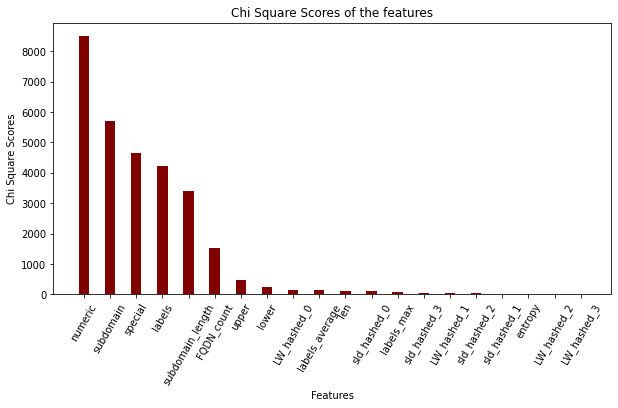

In [29]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(s.keys()), list(s.values()), color ='maroon', width = 0.4)

plt.xticks(rotation=60)
plt.xlabel("Features");
plt.ylabel("Chi Square Scores");
plt.title("Chi Square Scores of the features")

- By looking to the Chi-square test scores we found there is 6 most important features.

## Mutual Info test to find the highest features correlated with the target

In [30]:
from sklearn.feature_selection import chi2,f_classif, mutual_info_classif,SelectKBest
mutual_info = mutual_info_classif(X_val, y = y_val)

mutual_info_dict =dict()
for i in range(len(mutual_info)):
    mutual_info_dict[features_df.columns[i]]=mutual_info[i]

s=dict(sorted(mutual_info_dict.items(),key=lambda x:x[1],reverse=True))
s.values()

dict_values([0.2703288362530527, 0.26358990385419445, 0.259543438355494, 0.25136449733910515, 0.2399285239785094, 0.23507478036991758, 0.22131497314266846, 0.2175535877095376, 0.21259606679270426, 0.17164621945407132, 0.1541056296231642, 0.14723092646952907, 0.14103950708931068, 0.13140713389001846, 0.11309392609358926, 0.1027869207294494, 0.09734339593969477, 0.08305408788605528, 0.07722740118025939, 0.003840824854484781])

Text(0.5, 1.0, 'Mutual Info Scores of the features')

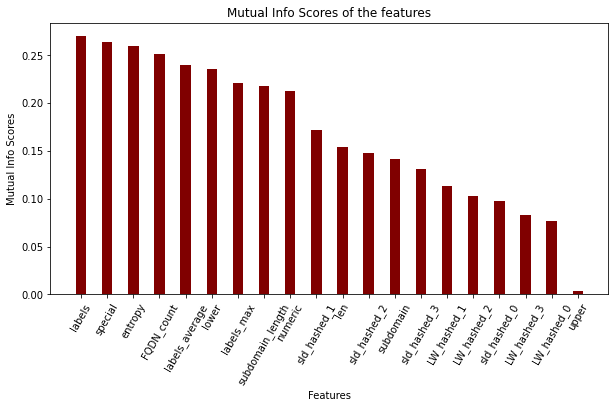

In [31]:
fig = plt.figure(figsize = (10, 5))
plt.bar(list(s.keys()), list(s.values()), color ='maroon', width = 0.4)

plt.xticks(rotation=60)
plt.xlabel("Features");
plt.ylabel("Mutual Info Scores");
plt.title("Mutual Info Scores of the features")

- From the above graph, there aren't clearly sufficient features that can be selected from the MI test as the score are so close.

## Feature selection using tree-based models

Text(0.5, 0, 'Random Forest Feature Importance')

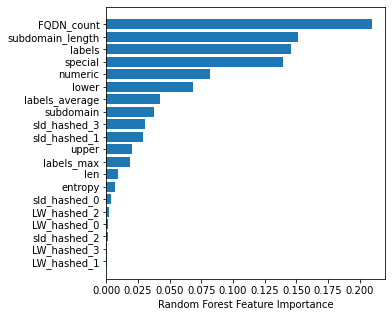

In [32]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(random_state=42)
rf.fit(X_val, y_val)

sorted_idx = rf.feature_importances_.argsort()

plt.figure(figsize=(5,5))
plt.barh(features_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

- The highest 4 feature ('FQDN_count', 'subdomain_length', 'special', 'labels')

Text(0.5, 0, 'XGBoost Feature Importance')

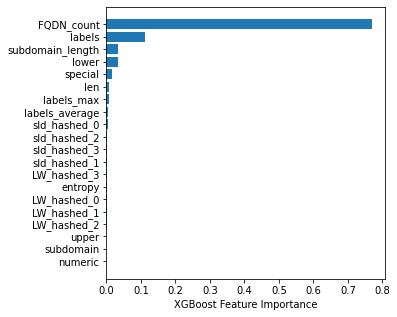

In [33]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_val, y_val)

sorted_idx = xgb.feature_importances_.argsort()

plt.figure(figsize=(5,5))
plt.barh(features_df.columns[sorted_idx], xgb.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")

- The highest 2 features ('FQDN_count', 'labels')


## Final selected set of features

In [34]:
selected_features = ['FQDN_count', 'subdomain_length', 'numeric', 'special', 'labels','subdomain']

- I would select 6 out of the 20 features, which include the highest significant 6 feature in chi-square, and the most important features for both the random forest and XGBoost algorithms.

# Training choices

**Data Splitting**<br>
I would split the dataset into train, validation, and test by 70%, 15%, and 15% percentage respectively
-	Train: To fit the normalizer (Scaler) and train the models using the cross-validation method on this set to evaluate the model’s stability and robustness accurately and efficiently without data leakage.
-	Test: To evaluate and compare the final models.
-	Validation: To select the features and apply the hyperparameter tuning on the models.


**Performance Metric**
- I have chosen the F1-Score as a metric to handle the small imbalance in the data while compromising between precision and recall as both are important in this problem, I don’t need to catch all the hacks while having a lot of false alarms (False Positive), and I don’t need to miss a lot of attacks while trying not to produce false alarms so I have chosen F1-score compromise between them.

In [35]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(RandomForestClassifier(random_state=42), X_train, y_train, cv=5)
scores_rf

array([0.82976871, 0.82230788, 0.82168615, 0.82821437, 0.82994466])

In [36]:
from sklearn.model_selection import cross_val_score

scores_xgb = cross_val_score(XGBClassifier(random_state=42), X_train, y_train, cv=5)
scores_xgb

array([0.82976871, 0.82205919, 0.82162397, 0.82796568, 0.82963377])

# Feature selection impact on the models

## Before feature selection

In [37]:
from sklearn.model_selection import cross_validate

scoring = ['recall', 'precision', 'f1']
scores1 = cross_validate(RandomForestClassifier(random_state=42), X_train, y_train, scoring=scoring)
scores1

{'fit_time': array([3.53432178, 2.94053626, 2.8204093 , 2.81004047, 2.87449145]),
 'score_time': array([0.17100644, 0.17190194, 0.17082238, 0.16769981, 0.3748107 ]),
 'test_recall': array([0.99965975, 0.99965979, 0.99965979, 0.99954638, 0.99965975]),
 'test_precision': array([0.76318296, 0.75535561, 0.7547089 , 0.76160028, 0.76338126]),
 'test_f1': array([0.86556025, 0.86050371, 0.86008391, 0.86449904, 0.86568777])}

In [38]:
from sklearn.model_selection import cross_validate

scoring = ['recall', 'precision', 'f1']
scores2 = cross_validate(XGBClassifier(random_state=42), X_train, y_train, scoring=scoring)
scores2

{'fit_time': array([4.99806738, 4.08000994, 4.10764313, 5.07065177, 5.40595341]),
 'score_time': array([0.07119608, 0.07131052, 0.07580566, 0.07004976, 0.07546139]),
 'test_recall': array([0.99920608, 0.99909276, 0.99943298, 0.99920617, 0.99920608]),
 'test_precision': array([0.76336539, 0.7553155 , 0.75473152, 0.76147265, 0.76323313]),
 'test_f1': array([0.86550742, 0.86026755, 0.86001464, 0.86428957, 0.8654224 ])}

## After feature selection

In [39]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=6).fit(X_train, y_train)
X_new.get_feature_names_out()

array(['FQDN_count', 'subdomain_length', 'numeric', 'special', 'labels',
       'subdomain'], dtype=object)

In [41]:
#selected features
X_train[selected_features]

,FQDN_count,subdomain_length,numeric,special,labels,subdomain
152483,0.735294,0.454545,0.916667,0.857143,0.833333,1.0
178425,0.352941,0.000000,0.000000,0.285714,0.333333,0.0
103249,0.647059,0.318182,0.666667,0.857143,0.833333,1.0
116425,0.470588,0.000000,0.166667,0.428571,0.166667,0.0
78128,0.705882,0.409091,0.833333,0.857143,0.833333,1.0
...,...,...,...,...,...,...
119883,0.735294,0.454545,0.916667,0.857143,0.833333,1.0
259186,0.647059,0.318182,0.666667,0.857143,0.833333,1.0
131936,0.735294,0.454545,0.916667,0.857143,0.833333,1.0
146871,0.647059,0.318182,0.666667,0.857143,0.833333,1.0


In [42]:
from sklearn.model_selection import cross_validate

scoring = ['recall', 'precision', 'f1']
scores3 = cross_validate(RandomForestClassifier(random_state=42), X_train[selected_features], y_train, scoring=scoring)
scores3

{'fit_time': array([1.63862729, 1.64964914, 4.89979625, 4.18120193, 2.88099265]),
 'score_time': array([0.15595341, 0.15697217, 0.52769732, 0.28019524, 0.30090857]),
 'test_recall': array([0.99943291, 0.99931957, 0.99931957, 0.99829893, 0.99863899]),
 'test_precision': array([0.76300978, 0.75516325, 0.75458126, 0.76130762, 0.76313053]),
 'test_f1': array([0.86536384, 0.86025284, 0.8598751 , 0.86384378, 0.8651437 ])}

In [43]:
from sklearn.model_selection import cross_validate

scoring = ['recall', 'precision', 'f1']
scores4 = cross_validate(XGBClassifier(random_state=42), X_train[selected_features], y_train, scoring=scoring)
scores4

{'fit_time': array([3.82747269, 2.69974256, 2.24141908, 2.24479127, 2.24458241]),
 'score_time': array([0.13244414, 0.05835772, 0.06483197, 0.06249642, 0.06062508]),
 'test_recall': array([0.99909266, 0.99897936, 0.99931957, 0.99852574, 0.99841216]),
 'test_precision': array([0.76334489, 0.75522977, 0.75471052, 0.76128307, 0.76315561]),
 'test_f1': array([0.86545169, 0.86016991, 0.85995901, 0.86391287, 0.86507469])}

## Comparing the models with and without the feature selection

### F1-Score

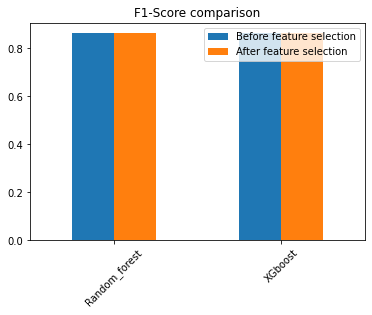

In [44]:
F1_score_comparison = {'Random_forest': [(scores1['test_f1']).mean(),(scores3['test_f1']).mean()],
                       'XGboost': [(scores2['test_f1']).mean(),(scores4['test_f1']).mean()]}
the_plot = pd.DataFrame.from_dict(F1_score_comparison, orient='index',columns=['Before feature selection', 'After feature selection'])
the_plot.plot(kind='bar',rot=45, title = 'F1-Score comparison');

### Precision

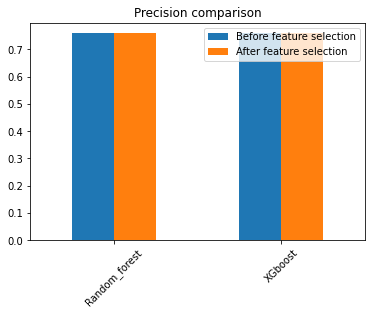

In [45]:
Precision_comparison = {'Random_forest': [(scores1['test_precision']).mean(),(scores3['test_precision']).mean()],
                       'XGboost': [(scores2['test_precision']).mean(),(scores4['test_precision']).mean()]}
the_plot = pd.DataFrame.from_dict(Precision_comparison, orient='index',columns=['Before feature selection', 'After feature selection'])
the_plot.plot(kind='bar',rot=45, title = 'Precision comparison');

### Recall

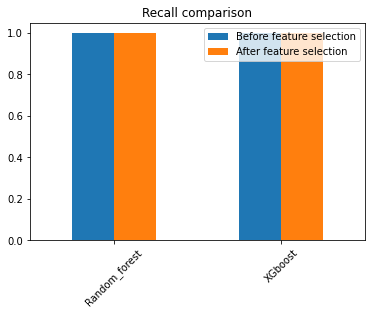

In [46]:
Recall_comparison = {'Random_forest': [(scores1['test_recall']).mean(),(scores3['test_recall']).mean()],
                       'XGboost': [(scores2['test_recall']).mean(),(scores4['test_recall']).mean()]}
the_plot = pd.DataFrame.from_dict(Recall_comparison, orient='index',columns=['Before feature selection', 'After feature selection'])
the_plot.plot(kind='bar',rot=45, title = 'Recall comparison');

### Training time

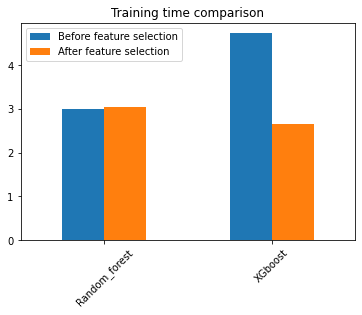

In [47]:
fit_time_comparison = {'Random_forest': [(scores1['fit_time']).mean(),(scores3['fit_time']).mean()],
                       'XGboost': [(scores2['fit_time']).mean(),(scores4['fit_time']).mean()]}
the_plot = pd.DataFrame.from_dict(fit_time_comparison, orient='index',columns=['Before feature selection', 'After feature selection'])
the_plot.plot(kind='bar',rot=45, title = 'Training time comparison');

### Inference time

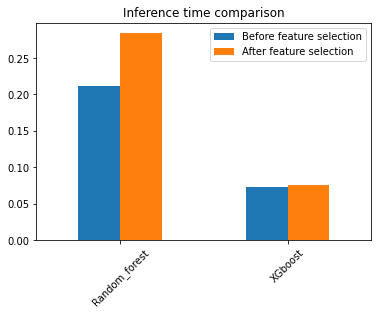

In [48]:
fit_time_comparison = {'Random_forest': [(scores1['score_time']).mean(),(scores3['score_time']).mean()],
                       'XGboost': [(scores2['score_time']).mean(),(scores4['score_time']).mean()]}
the_plot = pd.DataFrame.from_dict(fit_time_comparison, orient='index',columns=['Before feature selection', 'After feature selection'])
the_plot.plot(kind='bar',rot=45, title = 'Inference time comparison');

#### Conclusion

As shown in the above comparison, the training time and inference time were reduced while other metrics are almost the same after the feature selection so I selected the reduced features.

# Hpyertuning using the Gridsearch technique

I used the grid search technique to select the best hyperparameters for the models, which are Random Forest and XGBoost to select the best n_estimators and max_depth that achieve the highest f1-score over the validation set to avoid data leakage.

### Random Forest tuning

In [49]:
from sklearn.metrics import f1_score, make_scorer

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [50, 100, 200, 500], 'max_depth': [5, 10, 20]}
rf_hyperparameter = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')

In [50]:
rf_hyperparameter.fit(X_val[selected_features], y_val)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='f1')

In [51]:
rf_hyperparameter.best_score_

0.8620257681700216

In [52]:
rf_best_model = rf_hyperparameter.best_estimator_
rf_best_model

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)

### XGBoost tuning

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [50, 100, 200, 500], 'max_depth': [5, 10, 20]}
XGBoost_hyperparameter = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='f1')

In [54]:
XGBoost_hyperparameter.fit(X_val[selected_features], y_val)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 20],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='f1')

In [55]:
XGBoost_hyperparameter.best_score_

0.8620689227229994

In [56]:
XGBoost_best_model = XGBoost_hyperparameter.best_estimator_
XGBoost_best_model

XGBClassifier(max_depth=10, n_estimators=50, random_state=42)

**After tuning:**
- **The random forest's** best parameters are (max_depth=20, n_estimators=50), and the F1-score increased from 85.9% to 86.203%
- **The XGBoost's** best parameters are (max_depth=10, n_estimators=50), and the F1-score increased from 85.8% to 86.206%

# Choose the champion model

In [57]:
from sklearn.model_selection import cross_validate

scoring = ['recall', 'precision', 'f1']
rf_scores = cross_validate(RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42), X_train[selected_features], y_train, scoring=scoring)
rf_scores

{'fit_time': array([0.81722212, 0.82496333, 0.85742903, 0.82720256, 0.82647657]),
 'score_time': array([0.09705114, 0.09036207, 0.08842158, 0.09122562, 0.09049082]),
 'test_recall': array([0.99943291, 0.99931957, 0.99931957, 0.99829893, 0.99863899]),
 'test_precision': array([0.76300978, 0.75516325, 0.75458126, 0.76130762, 0.76313053]),
 'test_f1': array([0.86536384, 0.86025284, 0.8598751 , 0.86384378, 0.8651437 ])}

In [58]:
from sklearn.model_selection import cross_validate

scoring = ['recall', 'precision', 'f1']
XGBoost_scores = cross_validate(XGBClassifier(max_depth=10, n_estimators=50, random_state=42), X_train[selected_features], y_train, scoring=scoring)
XGBoost_scores

{'fit_time': array([2.12600994, 2.23249388, 2.23166585, 2.2559402 , 2.2278409 ]),
 'score_time': array([0.04418445, 0.04318786, 0.04358339, 0.0539248 , 0.04929757]),
 'test_recall': array([0.9993195 , 0.99920617, 0.99943298, 0.99841234, 0.99863899]),
 'test_precision': array([0.76331976, 0.75527173, 0.7546669 , 0.76126243, 0.76306439]),
 'test_f1': array([0.86552063, 0.8602812 , 0.85997268, 0.86385714, 0.8651012 ])}

## Comparing the models to choose the final model

### F1-Score, precision, and recall on the training set

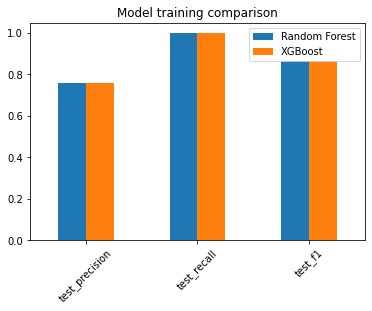

In [59]:
Training_comparison = {'test_precision': [(rf_scores['test_precision']).mean(),(XGBoost_scores['test_precision']).mean()],
                       'test_recall': [(rf_scores['test_recall']).mean(),(XGBoost_scores['test_recall']).mean()],
                       'test_f1': [(rf_scores['test_f1']).mean(),(XGBoost_scores['test_f1']).mean()],
                       }


the_plot = pd.DataFrame.from_dict(Training_comparison, orient='index',columns=['Random Forest', 'XGBoost'])
the_plot.plot(kind='bar',rot=45, title = 'Model training comparison');

### F1-Score, precision, and recall on the test set

In [60]:
from sklearn.metrics import f1_score, precision_score, recall_score
random_forest = RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
random_forest.fit(X_train, y_train)

rf_f1_score = f1_score(y_test, random_forest.predict(X_test))
rf_precision_score = precision_score(y_test, random_forest.predict(X_test))
rf_recall_score = recall_score(y_test, random_forest.predict(X_test))

In [61]:
from sklearn.metrics import f1_score
XGBoost = XGBClassifier(max_depth=10, n_estimators=50, random_state=42)
XGBoost.fit(X_train, y_train)

XGBoost_f1_score = f1_score(y_test, XGBoost.predict(X_test))
XGBoost_precision_score = precision_score(y_test, XGBoost.predict(X_test))
XGBoost_recall_score = recall_score(y_test, XGBoost.predict(X_test))

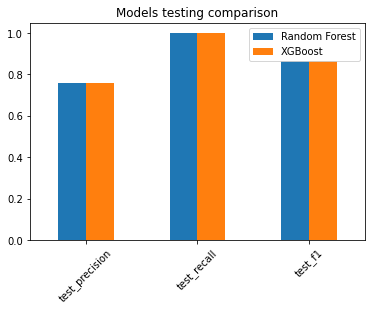

In [62]:
Models_comparison = {'test_precision': [rf_precision_score, XGBoost_precision_score],
                      'test_recall': [rf_recall_score, XGBoost_recall_score],
                      'test_f1': [rf_f1_score, XGBoost_f1_score],}


the_plot = pd.DataFrame.from_dict(Models_comparison, orient='index',columns=['Random Forest', 'XGBoost'])
the_plot.plot(kind='bar',rot=45, title = 'Models testing comparison');

- The 2 models almost has the same results so i would check the training and inferance time

### Model's Timing comparision

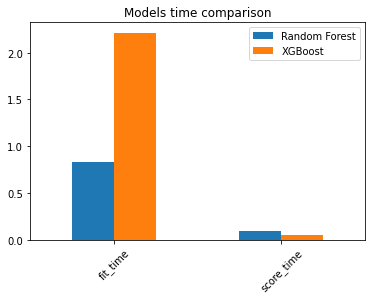

In [63]:
Time_comparison = {'fit_time': [(rf_scores['fit_time']).mean(), (XGBoost_scores['fit_time']).mean()],
                    'score_time': [(rf_scores['score_time']).mean(), (XGBoost_scores['score_time']).mean()],}

the_plot = pd.DataFrame.from_dict(Time_comparison, orient='index',columns=['Random Forest', 'XGBoost'])
the_plot.plot(kind='bar',rot=45, title = 'Models time comparison');

### Conclusion

From the above three graphs, we noticed that:
-	The random forest takes less time for training than XGBoost.
-	The XGBoost takes less time for inference than random forest.
-	F1-score, Prcision, and Recall for XGBoost and Random Forest almost the same


Static vs Dynamic models suitability comparison:
- **For static models**, it's better to choose the XGBoost as it's faster at inference time and only trains once.
- **For the dynamic model**, it's better to choose the random forest as it has less training time, especially as the training set increases with time and require multiple training iterations.


**So, I would continue with the random forest.**

# Building the pipeline and save the model

**The pipeline:**
- Drop nans
- Feature selection
- MinMaxScaler
- Random Forest Classifier

In [64]:
from sklearn.pipeline import Pipeline

final_pipeline = Pipeline([('MinMaxScaler', MinMaxScaler()), ('RandomForestClassifier', RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42))])

## Train the pipeline on the whole static dataset

In [65]:
import pandas as pd
static_data = pd.read_csv('/content/Static_dataset.csv')
static_data.head(5)

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,56:19.8,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
1,07:23.9,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1
2,23:15.1,26,9,0,10,10,2.742338,6,6,7,3.500000,2,192,13,1,0
3,04:51.9,27,10,0,10,11,2.570417,6,6,7,3.666667,2,192,14,1,1
4,12:44.0,15,9,0,11,0,2.929439,4,3,5,4.333333,local,local,15,1,1


In [66]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
selected_features = ['FQDN_count', 'subdomain_length', 'numeric', 'special', 'labels','subdomain']

# prepocessing on the data
static_data.dropna(inplace=True)
static_labels = static_data['Target Attack']
static_features = static_data.copy().drop('Target Attack', axis=1)
static_features = static_features[selected_features]

In [72]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,accuracy_score

final_pipeline.fit(static_features[selected_features], static_labels)

print(classification_report(final_pipeline.predict(static_features),static_labels))
print(f1_score(static_labels, final_pipeline.predict(static_features[selected_features])))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76     74442
           1       1.00      0.76      0.86    193624

    accuracy                           0.83    268066
   macro avg       0.81      0.88      0.81    268066
weighted avg       0.89      0.83      0.83    268066

0.8628914651572902


### Save the pipeline in pikle format

In [68]:
import joblib
joblib.dump(final_pipeline, 'pipeline.pkl')
loaded_pipeline = joblib.load('pipeline.pkl')

# Test the model on the kafka dataset to validate the saved and loaded pipleline are the same

In [69]:
import pandas as pd
kafka_data = pd.read_csv('/content/Kafka_dataset.csv')
kafka_data.head()

,timestamp,FQDN_count,subdomain_length,upper,lower,numeric,entropy,special,labels,labels_max,labels_average,longest_word,sld,len,subdomain,Target Attack
0,20:54.9,13,0,0,12,0,2.781301,1,2,10,6.000000,games,gamesisart,11,0,0
1,40:06.7,25,8,0,10,9,2.786216,6,6,7,3.333333,2,192,12,1,0
2,26:34.8,8,0,0,6,0,2.154135,2,2,5,3.500000,cm,cm-tv,6,0,0
3,27:12.4,20,3,0,18,0,2.905639,2,3,12,6.000000,cacao,leyaeducacao,16,1,0
4,39:19.0,27,10,0,10,11,2.767195,6,6,7,3.666667,2,192,14,1,1


In [70]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

kafka_data.dropna(inplace=True)
kafka_labels = kafka_data['Target Attack']
kafka_features = kafka_data.copy().drop('Target Attack', axis=1)
kafka_features = kafka_features[selected_features]

In [71]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import f1_score

print(classification_report(final_pipeline.predict(kafka_features),kafka_labels))
print(f1_score(kafka_labels, final_pipeline.predict(kafka_features[selected_features])))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74     71704
           1       1.00      0.75      0.86    196354

    accuracy                           0.82    268058
   macro avg       0.80      0.87      0.80    268058
weighted avg       0.89      0.82      0.83    268058

0.8556740644139633


# Simulate the kafka stream for validation perpuses

In [ ]:
from copy import deepcopy
selected_features = ['FQDN_count', 'subdomain_length', 'numeric', 'special', 'labels','subdomain']

static_pipeline = deepcopy(loaded_pipeline)
dynamic_pipeline = deepcopy(loaded_pipeline)

static_scores = []
dynamic_scores = []
train_counter = 0

old_data = pd.DataFrame()

for i in range(266):
  # get a window of 1000 new arrived data points
  batch_data = kafka_data.iloc[i*1000:(i+1)*1000]

  # apply preprocessing on the batch dataset
  batch_data.dropna(inplace=True)
  old_data = old_data.append(batch_data)
  # old_data = pd.concat([old_data, batch_data])

  kafka_label = batch_data['Target Attack']
  kafka_features = batch_data[selected_features]

  # evaluate the static model
  static_score = f1_score(kafka_label, static_pipeline.predict(batch_data[selected_features]))
  # evaluate the dynamic model
  dynamic_score = f1_score(kafka_label, dynamic_pipeline.predict(kafka_features))
  
  # training discussion
  if dynamic_score < .85:
    train_counter += 1
    label_train = old_data['Target Attack']
    f_train = old_data[selected_features]
    dynamic_pipeline.fit(f_train, label_train)
    dynamic_score = f1_score(kafka_label, dynamic_pipeline.predict(kafka_features))

  static_scores.append(static_score)
  dynamic_scores.append(dynamic_score)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

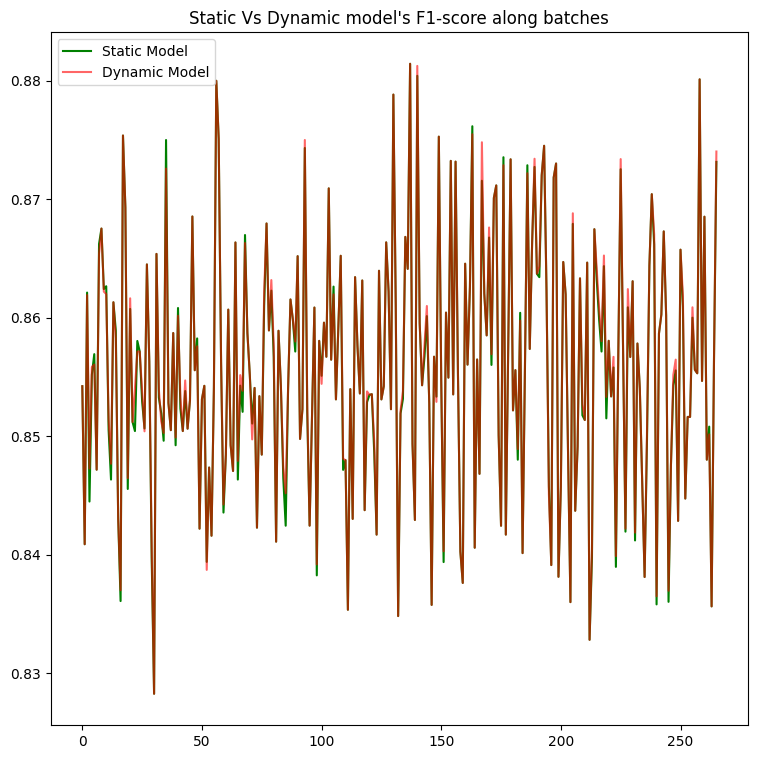

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))

plt.plot(range(266), static_scores,  label = "Static Model",  color='green');
plt.plot(range(266), dynamic_scores , label = "Dynamic Model", color='red', alpha=0.6);
plt.title("Static Vs Dynamic model's F1-score along batches")
plt.legend()
plt.show()

In [ ]:
from copy import deepcopy
selected_features = ['FQDN_count', 'subdomain_length', 'numeric', 'special', 'labels','subdomain']

static_pipeline = deepcopy(loaded_pipeline)
dynamic_pipeline = deepcopy(loaded_pipeline)

static_scores = []
dynamic_scores = []
train_counter = 0

old_data = pd.read_csv('/content/Static_dataset.csv')

for i in range(266):
  # get a window of 1000 new arrived data points
  batch_data = kafka_data.iloc[i*1000:(i+1)*1000]

  # apply preprocessing on the batch dataset
  batch_data.dropna(inplace=True)
  old_data = old_data.append(batch_data)
  # old_data = pd.concat([old_data, batch_data])

  kafka_label = batch_data['Target Attack']
  kafka_features = batch_data[selected_features]

  # evaluate the static model
  static_score = f1_score(kafka_label, static_pipeline.predict(batch_data[selected_features]))
  # evaluate the dynamic model
  dynamic_score = f1_score(kafka_label, dynamic_pipeline.predict(kafka_features))
  
  # training discussion
  if dynamic_score < .85:
    train_counter += 1
    label_train = old_data['Target Attack']
    f_train = old_data[selected_features]
    dynamic_pipeline.fit(f_train, label_train)
    dynamic_score = f1_score(kafka_label, dynamic_pipeline.predict(kafka_features))

  static_scores.append(static_score)
  dynamic_scores.append(dynamic_score)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/

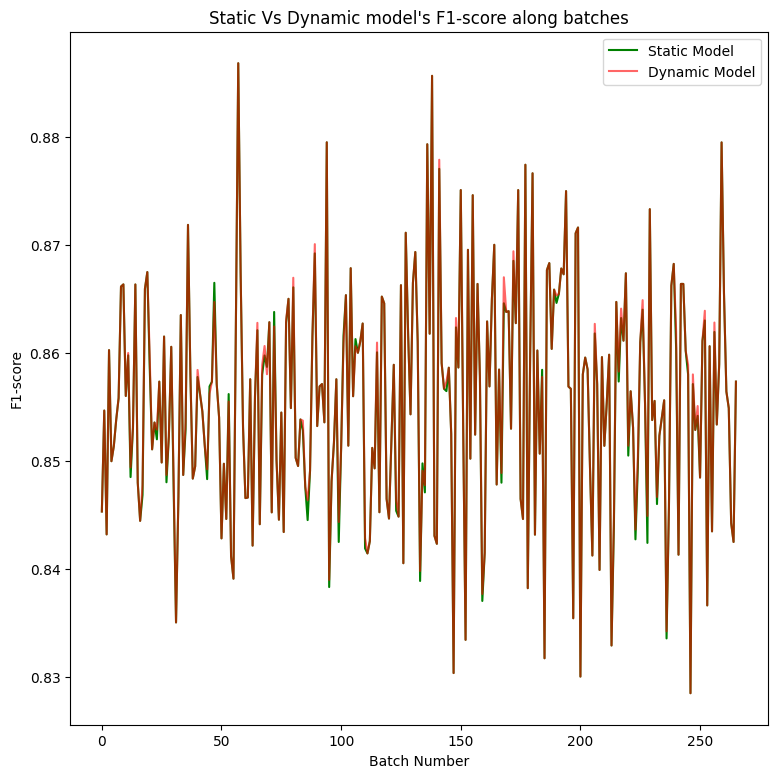

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 9))

plt.plot(range(266), static_scores,  label = "Static Model",  color='green');
plt.plot(range(266), dynamic_scores , label = "Dynamic Model", color='red', alpha=0.6);
plt.title("Static Vs Dynamic model's F1-score along batches")
plt.ylabel('F1-score')
plt.xlabel('Batch Number')
plt.legend()
plt.show()